# Iterative Prisoner's Dilemma


The [Prisoner's Dilemma](https://en.wikipedia.org/wiki/Prisoner%27s_dilemma) (PD) is a classical game analyzed in game theory, which is widely used to (attempt to) model social/economical interaction. It's a "dilemma" as, if exploited to explain the emergence of altruism in human or in general animal society, it fails badly at a first glance.

The classical situation-representation of the PD is that of two prisoners whose conviction depends on their mutual cooperation. It is easier understood though if illustrated in terms of a trade-off game (closed bag exachange):

*Two people meet and exchange closed bags, with the understanding that one of them contains money, and the other contains a purchase. Either player can choose to honor the deal by putting into his or her bag what he or she agreed, or he or she can defect by handing over an empty bag.*


*Or the advertising and even marketing example; Assume you and a competitor have an equal share in the market and relatively high prices with nice profit margins. Should you lower your price? Let’s see what the payoffs look like:*

If you both cooperate and keep prices high, you each make 10 million in profit,if you both compete and lower prices,you each make 5 million in profit. 
If you lower prices and your competitor doesn’t, you makeonly  2 million in profit and your competitor makes 13 million.
If your competitor lowers prices and you don’t, your competitor makes 2 million and you make 13 million.


The dilemma: In every scenario you are better off when you lower your price. The same is true for your competitor. But, if you both lower the price, you each make only 5 million in profit. Whereas if you could find a way to cooperate, without either of you lowering your price, you would each end up with 10 million.





# 
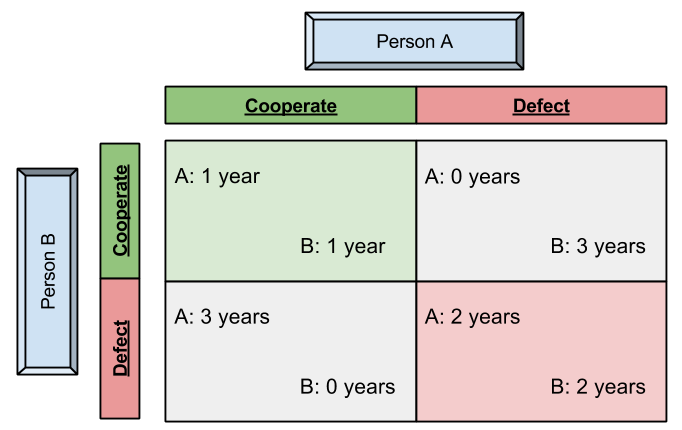
# 


It is obvious that for both players the winning strategy is to NOT cooperate.

Things changes when the interaction between the two individuals is iterated, in that case a more altruist attitude (strategy) is expected to emerge. The goal of this project is to test this hypothesis.

Mathematically the PD can be expressed with very basic linear algebra. The key component is the **Payoff matrix** $M$, which quantify the reward each player gets depending on whether she cooperated or not (defect):

$$
M = 
\begin{pmatrix} 
R & S \\
T & P 
\end{pmatrix}
$$

with $T,R,S,P$ integers that satisfy the following conditions:

$$
T>R>P>S; \quad 2R > T+S
$$

for example $T=3$, $R=2$, $P=1$ and $S=0$, or  $T=5$, $R=3$, $P=2$, $S=0$. Each player choice (move) can be represented by one of the two axis in ${\rm I\!R}^2$, i.e. $u_C=\begin{pmatrix} 1 \\ 0 \end{pmatrix}$ or $u_D=\begin{pmatrix} 0 \\ 1 \end{pmatrix}$, where the first coordinate stands for *Cooperate* and the second for *Defect*. Being $u_1$ and $u_2$ their rewards $r_1$ and $r_2$ can be computed then as:

$$
r_1 = u_1^T M u_2
\quad
\quad
r_2 = u_2^T M u_1
$$




In [460]:
k = 25  # percentage for mainlybad or mainlynice
u_c = np.array([1,0])
u_d = np.array([0,1])
M = np.array([[2,0], [3,1]])   #the payoff matrix

## Functions For Implemented Strategies


The strategy can be represented as a function which outputs either $u_C$ or $u_D$. Such function can depend on the opponent's history of moves, her on history of moves, on the number of moves played till that moment and so on, but it can only be based on a probability density function. Possible strategies are:

* **Nice guy**: always cooperate (the function's output is always $u_D$)
* **Bad guy**: always defect (the function's output is always $u_C$)
* **Mainly nice**: randomly defect $k\%$ of the times and cooperate $100-k\%$, $k<50$
* **Mainly bad**: randomly defect $k\%$ of the times and cooperate $100-k\%$, $k>50$
* **tit-for-tat**: start by cooperating, then repeat what the opponent has done in the previous move 
* **Random**: defects or cooperates randomly
* **Forgiving Tit-For-Tat**: starts by cooperating, then repeats what the opponent has done in the previous move, but defects only if the opponent defects for two consecutive rounds
* **Suspicious Tit-For-Tat**: starts by defecting, then repeats what the opponent has done in the previous move
* **Hard Tit for Tat**: cooperates on the first move, and defects if the opponent has defected on any of the previous 3 moves, else cooperates.
* **Reverse Tit for Tat**: it does the reverse of TFT. It defects on the first move, then plays the reverse of the opponent’s last move.
* **Grudger or Grim**: starts by cooperating, but if the opponent defects one time, it will always defect. (untill the end of the tournament)
* **Pavlov**: cooperates if in the previous round he and the opponent had done the same move, otherwise defects.
* **Hard Joss**: plays like Tit-for-Tat, but cooperates only with probability 0.9.
* **Soft Joss**: plays like Tit-for-Tat, but defects only with probability0.9



In [1]:
#function of nice guy strategy
def s_niceguy(u_1h = None, u_2h = None):
    return u_c


#function of bad guy strategy
def s_badguy(u_1h = None, u_2h = None):
    return u_d


#function of mainly nice guy strategy
def s_mnice(u_1h = None, u_2h = None):
    a = npr.rand()
    if (a > k/100): 
        return u_c
    else: 
        return u_d

    
#function of mainly bad guy strategy    
def s_mbad(u_1h = None, u_2h = None):
    a = npr.rand()
    if (a > k/100):
        return u_d
    else: 
        return u_c

    
#function of Tit_For_Tat strategy
def s_titfortat(u_1h, u_2h):
    if (len(u_1h) == 0):
        return u_c
    else:
        return u_2h[-1]

    
#function of Random strategy    
def s_random(u_1h, u_2h):
    a = npr.rand()
    if (a < 0.5):
        return u_c
    else:
        return u_d
    

#function of Forgiving Tit_For_Tat strategy
def s_forgiving_titfortat(u_1h, u_2h):
    if (len(u_1h) < 2):
        return u_c
    else:
        if((u_2h[-1] == u_d).all() and (u_2h[-2] == u_d).all()):
            return u_d
        else:
            return u_c
        

#function of Pavlov strategy        
def s_pavlov(u_1h, u_2h):
    if(len(u_1h) == 0):
        return u_c
    elif((u_1h[-1] == u_2h[-1]).all()):
        return u_c
    else:
        return u_d
    

#function of Suspicious Tit_For_Tat strategy    
def s_suspicious_titfortat(u_1h, u_2h):
    if (len(u_1h) == 0):
        return u_d
    else:
        return u_2h[-1]
    

#function of Reversed Tit_For_Tat strategy    
def s_reversed_titfortat(u_1h, u_2h):
    if (len(u_1h) == 0):
        return u_d
    elif((u_2h[-1] == u_d).all()):
        return u_c
    else:
        return u_d
    

#function of Hard Tit_For_Tat strategy    
def s_hard_titfortat(u_1h, u_2h):
    if(len(u_1h) < 3):
        if(len(u_1h) == 0):
            return u_c
        elif(len(u_1h) == 1):
            return u_2h[-1]
        elif((u_2h[-1] == u_d).all() or (u_2h[-2] == u_d).all()):
            return u_d
        else:
            return u_c
        
    elif((u_2h[-1] == u_d).all() or (u_2h[-2] == u_d).all() or (u_2h[-3] == u_d).all()):
        return u_d
    else:
        return u_c
    
#function of Grudger(Grim) strategy
def s_grudger(u_1h, u_2h):
    if(len(u_1h) == 0):
        return u_c
    else:
        if((u_2h == u_d).any()):
            return u_d
        else:
            return u_c
        
        
#function of Hard joss strategy    
def s_hard_joss(u_1h, u_2h):
    
    p = 0.9
    a = npr.rand()
    
    if (len(u_1h) == 0):
        if a < p :
            return u_c
        else:
            return u_d
    else:
        if (u_2h[-1] == u_c).all():
            if a < p :
                return u_2h[-1]
            else:
                return u_d
            
        else:
            return u_d
    
#function of Soft joss strategy     
def s_soft_joss(u_1h, u_2h):
    p = 0.9
    a = npr.rand()
    
    if (len(u_1h) == 0):
         return u_c
       
    else:
        if (u_2h[-1] == u_d).all():
            if a < p :
                return u_2h[-1]
            else:
                return u_c
            
        else:
            return u_c



In [462]:
def reward(u,v): # reward of u
    return u @ ( M @ v)

# 
### Define a dictionary for different strategies
Strats dictionary correllate a string of the name of strategy with its corresponding function. It helps to recall particullar strategy.
### 

In [463]:
strats = {'nice': s_niceguy,
          'bad': s_badguy,
          'mnice': s_mnice,
          'mbad': s_mbad,
          'titfortat': s_titfortat,
          'random': s_random,
          'forgiving_titfortat': s_forgiving_titfortat,
          'suspicious_titfortat': s_suspicious_titfortat,
          'reversed_titfortat': s_reversed_titfortat,
          'hard_titfortat': s_hard_titfortat,
          'pavlov': s_pavlov,
          'grudger': s_grudger,
          'hard_joss' : s_hard_joss,
          'soft_joss': s_soft_joss
            }


## Assignment 1: iterative prisoner's dilemma (IPD) between two players

To study the IPD (1 vs 1 tournament) we implemented the IPD function:

Input: 2 different strategies and number of iteration(N)
     
We computed the score of each player at each iteration with its average.


In [464]:
def IPD(N, s_1, s_2):
    
    score1 = np.zeros(N)
    score2 = np.zeros(N)
    
        
    u_1h = []
    u_2h = []
    avg_rew = 0
    
    for i in range(N):
        
        u_1 = strats[s_1](u_1h, u_2h)
        u_2 = strats[s_2](u_2h, u_1h)
        
        u_1h.append(u_1)
        u_2h.append(u_2)
       
        score1[i] = reward(u_1, u_2)
        score2[i] = reward(u_2, u_1)
        avg_rew += reward(u_1, u_2)
    avg_rew = avg_rew / N
   
    
    return score1,score2,u_1h,u_2h,avg_rew


In [466]:
scoresmatrix = np.zeros((len(strats), len(strats)))

for i, s_1 in enumerate(strats):
    for j, s_2 in enumerate(strats):
        scoresmatrix[i][j] = IPD(N, s_1, s_2)[4]
        

In [ ]:
df = pd.DataFrame(scoresmatrix, index = strats , columns = strats)


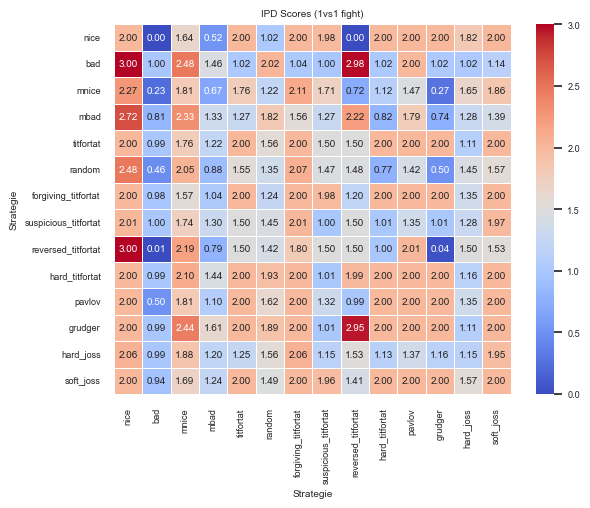

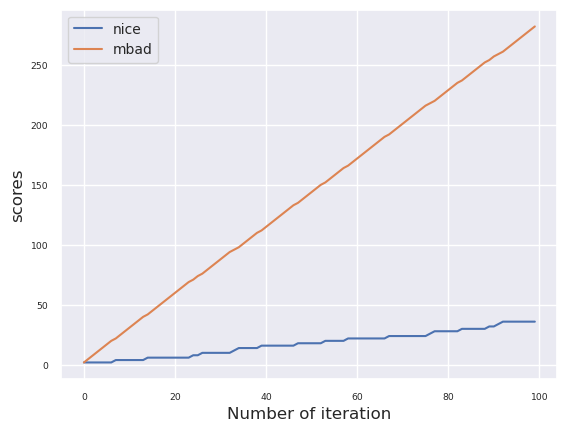

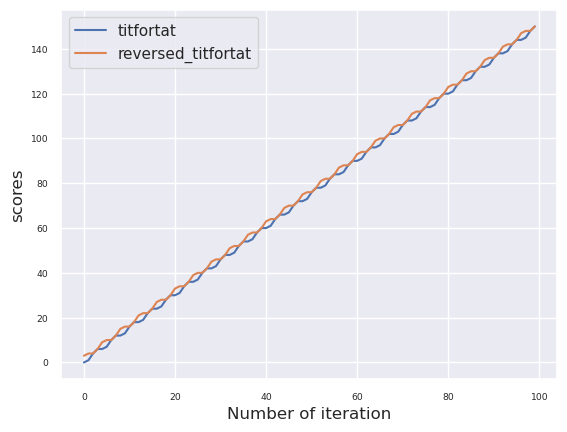

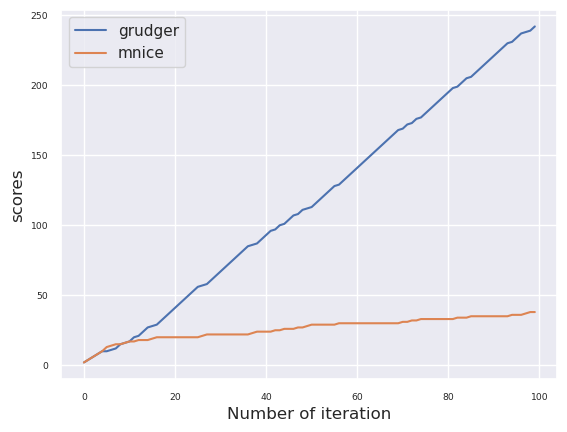

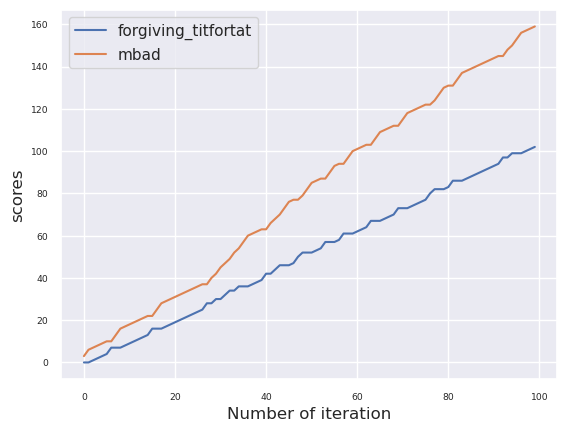

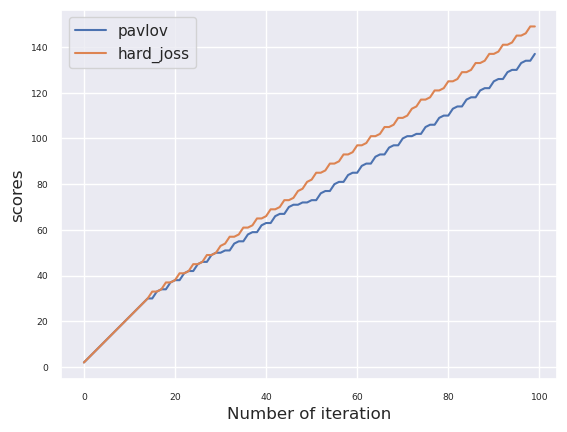

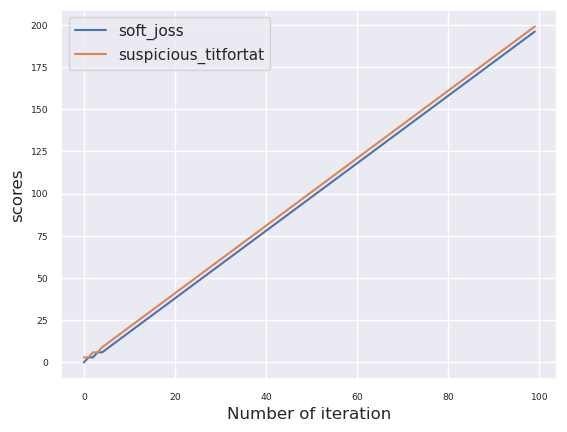

The most aggressive strategy, bad guy, never lose the game and always get a win or a draw.

# Assignment 2: multiple players IPD (MPIPD) between players

# Round robin scheme
Round robin is a common tournament format used in various sports and games, including many types of leagues. In a round robin league, each team plays against every other team in the league once, and the team with the most wins at the end of the season is declared the champion.

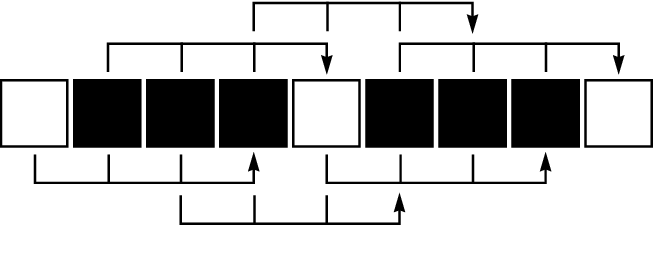

In [52]:
def define_initial_population(n): #build the initial population
    population = []
    for c,i in enumerate(n):
        for j in range(i):
            population.append(list(strats.keys())[c])
    return np.array(population)

In [54]:
def MPIPD(n, N_t): #n is a vector of the number of players for each strategy in the initial configuration, N is the number of tournament
    n_players = np.sum(n)
    players_MPIPD = define_initial_population(n)
    N = N_t
    u_1h = [[[] for i in range(n_players)] for j in range(n_players)]
    avgp = np.empty((n_players, N))

    for i in range(N): #for each tournament iteration
        avg_rew = 0
        for a,s_1 in enumerate(players_MPIPD): #for each player 1
            tot_rew = 0
            for b,s_2 in enumerate(players_MPIPD): #for each player 2 different from player 1
                if(a!=b):
                    u_1 = strats[s_1](u_1h[a][b], u_1h[b][a]) #we consider only strats that depends on history of the same match for now
                    u_2 = strats[s_2](u_1h[b][a], u_1h[a][b])
                    u_1h[a][b].append(u_1)
                    u_1h[b][a].append(u_2)
                    tot_rew += reward(u_1, u_2)
            avgp[a,i] = (tot_rew/(len(players_MPIPD)-1))
    
            
                    
    res = dict(zip(players_MPIPD, np.mean(avgp, axis=1)))

   
   
    plt.figure(figsize=(18, 6))
    res = pd.Series(res).sort_values(ascending=False)
    plt.bar(range(len(res)), res.values, color=[strats_colors[key] for key in res.index])
    plt.xticks(range(len(res)), res.index, fontsize=14)
    plt.ylabel('average reward', fontsize=14)
    plt.ylim(0, max(res.values) + 0.5) 
    for i, v in enumerate(res.values):
        plt.text(i, v + 0.1, str(round(v, 2)), fontsize=14, ha='center')
    
    

    return res


At the first step we start with equal number of players for each strategies:

The number of players for  nice  strategy is:  10 
The number of players for  bad  strategy is:  10 
The number of players for  mnice  strategy is:  10 
The number of players for  mbad  strategy is:  10 
The number of players for  titfortat  strategy is:  10 


bad          1.816327
mbad         1.675510
titfortat    1.598776
mnice        1.340612
nice         1.178367
dtype: float64

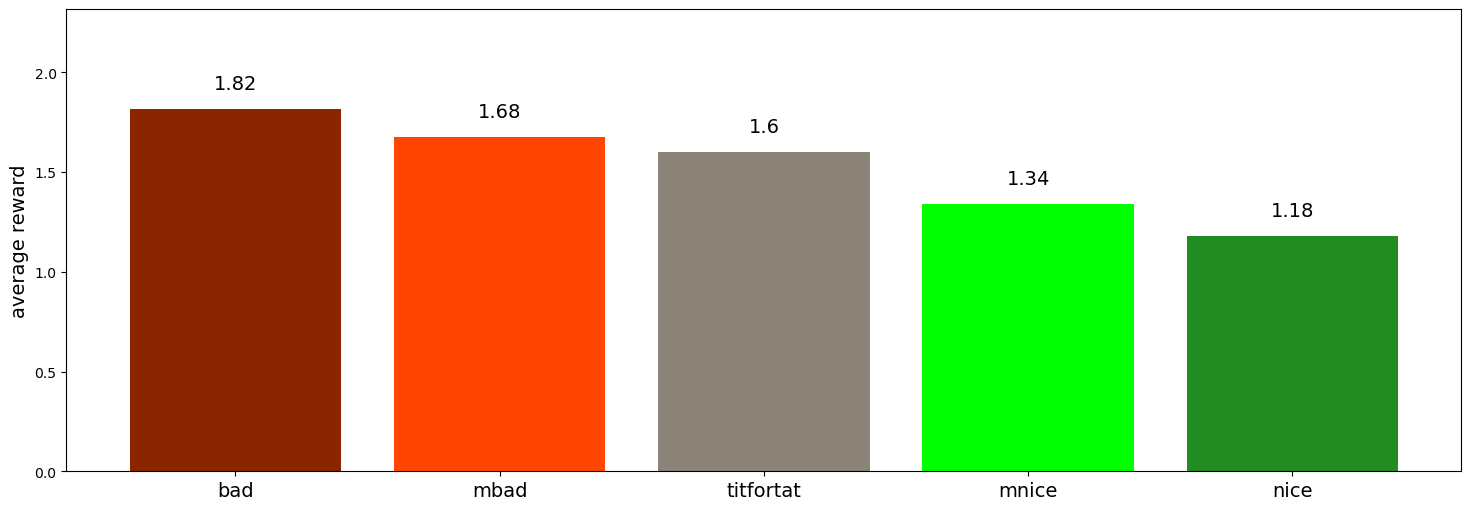

In [55]:
n=[10,10,10,10,10]
count_num(n)
MPIPD(n,100)

# NOTICEABLE POINT
Now we change the number of players for each strategy. Sometimes the result will be changed; this fact is rooted in method of strategies.
Generally, the specific outcome of the game will depend on many factors, including the number of players for each strategy:

# Nice guy and Mainly_nice guy are never winning strategy !

In the prisoner's dilemma, the strategy of being a "nice guy" or a "mnice guy" is never a winning strategy.
Being a "nice guy" or a "mnice guy" can lead to being taken advantage of by the other players if they choose to defect.
They are not winning strategies indipendently from theirs populations.

The number of players for  nice  strategy is:  20 
The number of players for  bad  strategy is:  5 
The number of players for  mnice  strategy is:  20 
The number of players for  mbad  strategy is:  3 
The number of players for  titfortat  strategy is:  2 


bad          2.459592
mbad         2.210000
titfortat    1.746122
mnice        1.738367
nice         1.497959
dtype: float64

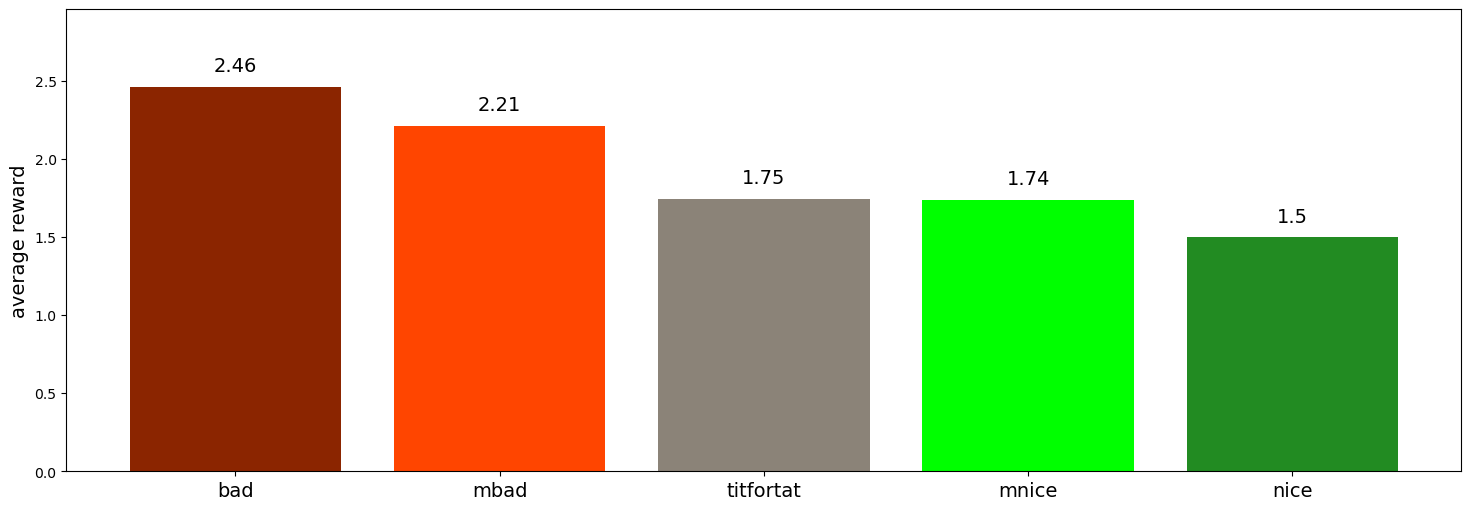

In [56]:
n=[20,5,20,3,2]
count_num(n)
MPIPD(n,100)

The number of players for  nice  strategy is:  20 
The number of players for  bad  strategy is:  5 
The number of players for  mnice  strategy is:  15 
The number of players for  mbad  strategy is:  5 
The number of players for  titfortat  strategy is:  5 


bad          2.337959
mbad         2.121633
titfortat    1.743878
mnice        1.694694
nice         1.493061
dtype: float64

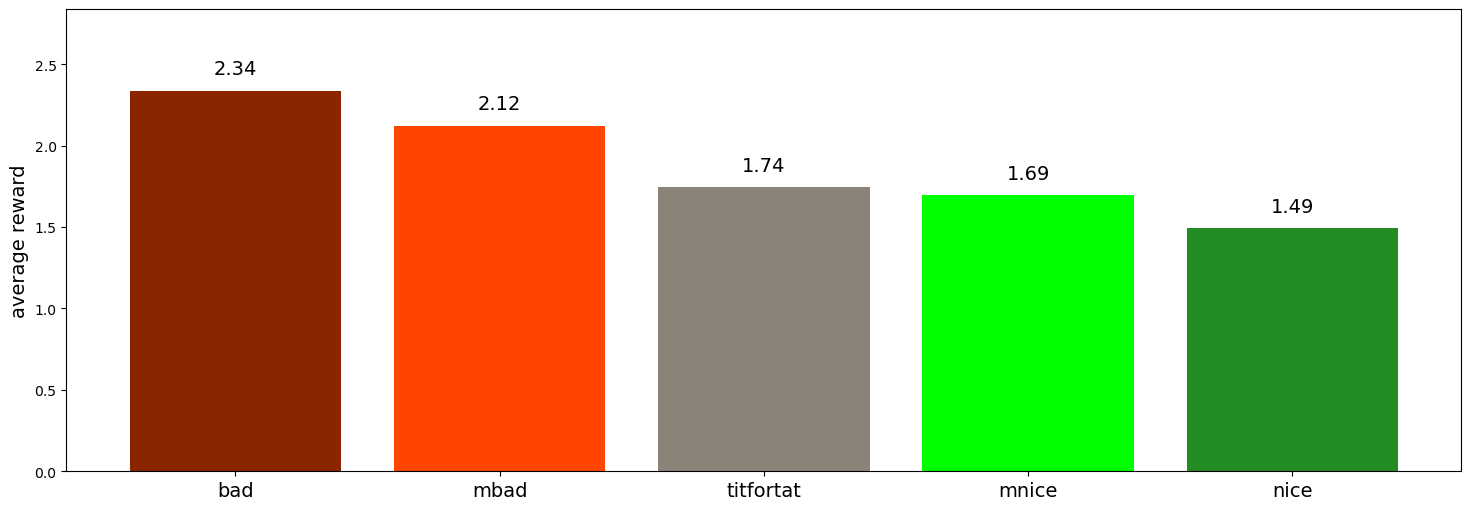

In [57]:
n=[20,5,15,5,5]
count_num(n)
MPIPD(n,100)

# Effect of changing populations:
The number of players can affect the outcome and the best strategy in a prisoner's dilemma game. 

As the number of players of a particular strategy increases, the game becomes more complex, and the best strategy may not be as clear as in a two-player game.

For example, the mainly bad guy strategy may be effective when there are only a few players using it because it can take advantage of the trust and cooperation of other players. However, if too many players are using the mainly bad guy strategy, it can lead to a situation where no one benefits.

The number of players for  nice  strategy is:  5 
The number of players for  bad  strategy is:  10 
The number of players for  mnice  strategy is:  5 
The number of players for  mbad  strategy is:  20 
The number of players for  titfortat  strategy is:  10 


bad          1.577551
titfortat    1.468367
mbad         1.411429
mnice        1.069388
nice         0.915918
dtype: float64

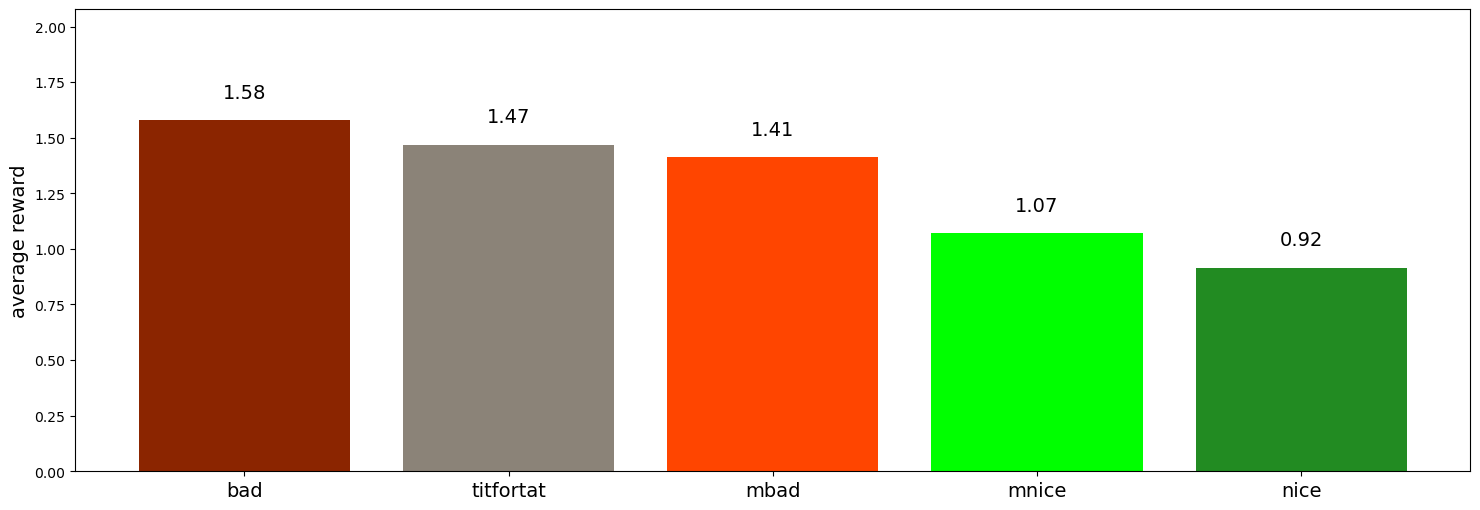

In [58]:
n=[5,10,5,20,10]
count_num(n)
MPIPD(n,100)

The number of players for  nice  strategy is:  5 
The number of players for  bad  strategy is:  15 
The number of players for  mnice  strategy is:  5 
The number of players for  mbad  strategy is:  5 
The number of players for  titfortat  strategy is:  20 


titfortat    1.583061
bad          1.407347
mbad         1.343878
mnice        1.231224
nice         1.184898
dtype: float64

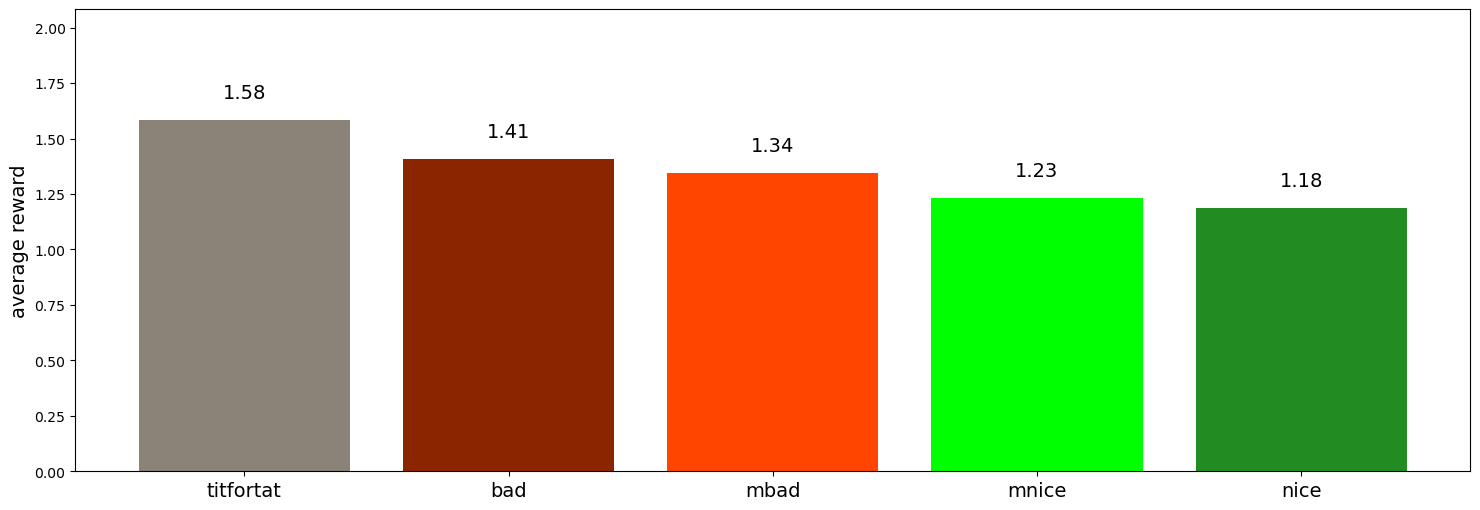

In [59]:
n=[5,15,5,5,20]
count_num(n)
MPIPD(n,100)

In general, the specific outcome of the game will depend on many factors, including the number of players for each strategy, the strategies used by the other players, and the specific payoffs associated with each strategy. Therefore, it's difficult to predict the outcome of the game without more information about these factors.

grudger             1.904815
hard_titfortat      1.757963
bad                 1.649630
forgiv_titfortat    1.638333
titfortat           1.530000
mbad                1.507593
rev_titfortat       1.394630
random              1.392963
nice                1.357407
sus_titfortat       1.283889
mnice               1.273704
dtype: float64

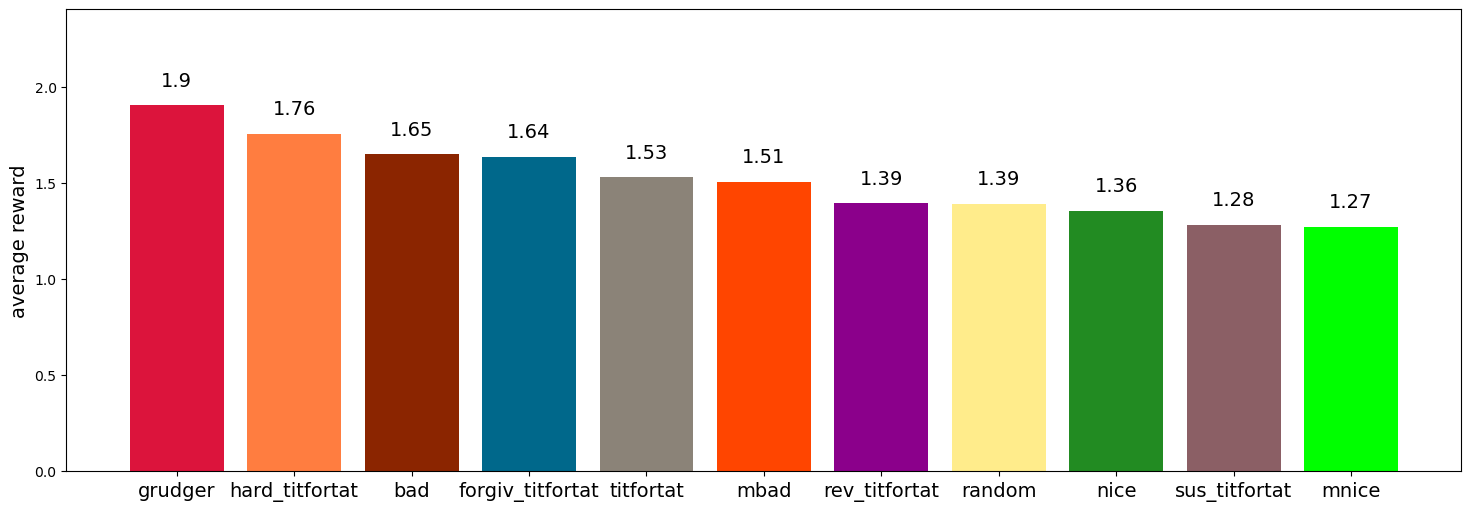

In [49]:
n=[5 for i in range(len(strats))]
MPIPD(n,100)

## 3. Repeated MPIPD (rMPIPD)

In this task we will repeat a full tournament for a given number of times (super-iterations). the goal is to update the populations of each strategy at the begining of each tornament, according to the performance of that particular stratagy in the previous tournament. 

The first step is to define a suitable function by which we can update the populations: an update function

###  Update Function

We should have a model for the way the populations will change. This might even depend on what we are trying to simulate by rMPIPD. 

Our model does not resemble a reproduction scenario, it is more similar to a continous transfer of players between different strategy groups. We will have a flow of players from one group to another, but the total population will be preserved constant. 

We want to create a matrix in which element <i> ij </i> corresponds to the rate of the flow of players from strategy <i> j </i> to strategy <i> i </i>. The most straight-forward way to construct such a matrix, is to start with the normalized scores of each strategy (the fraction of the total scores achieved by a particular strategy), and substract them from each other. This way the values of the elements will be propotional to how much a starategy is better than the other and vice versa. By construction the matrix is anti-symmetric.

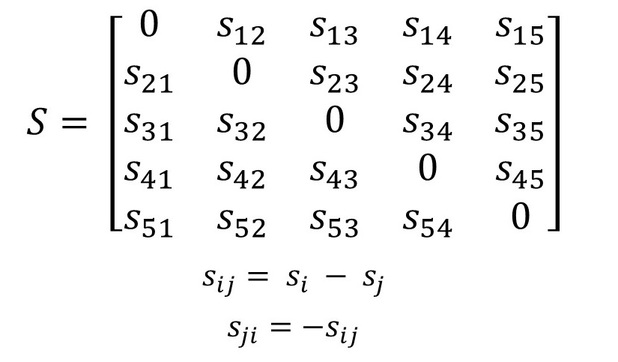

Next we start to interpret the matrix as a probability of a transfer between startegies. We generate a random number between 0 and 1, and compare it with the value of the element we are considering. Based on the result of the comparison we decide if a transfer is going to happen between the two strategies or not. This way we construct a new matrix called the transfer matrix. The values of the elements will be either zero (if no transfer is going to happen) or 1 (if there is a transfer of a player from another strategy to the current one) or -1 (if there is a transfer of player from the current strategy to another). The net sum of the elements in row <i> i </i> of the matrix corresponds to the net flow to the strategy <i> i </i>. 

It should be obvious by now, that we have introduced a stochastic model for updating the population of the strategies at each super-iteration. 

There is one more point to be considered when using the transfer matrix to update the populations. Obviously, we should not allow populations to drop below zero. That is to say, while performing a transfer, we should allow it to happen only if after the transfer, the population of the strategies being considered is not negative.

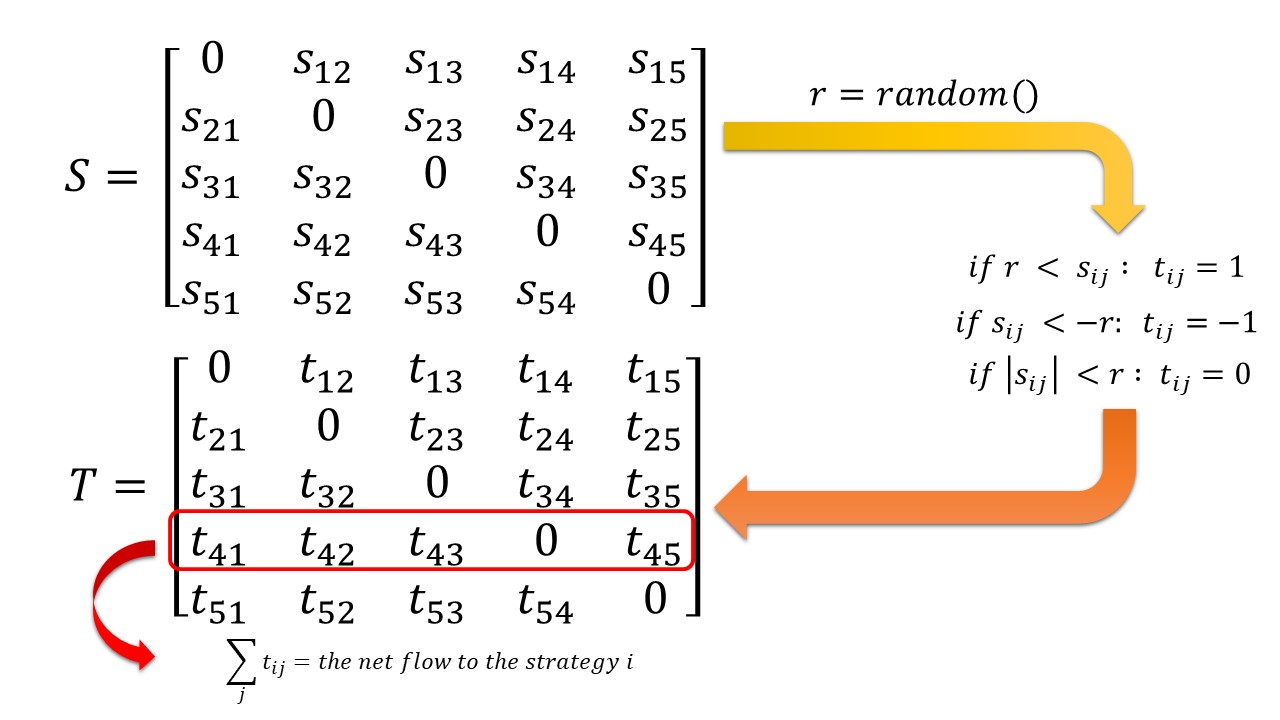

Below, you can find the function implementing the above procedure. We have given it the name exchangepop(). 

In [51]:
def exchangepop(n, normalized_scores):
    
    
    transfer = normalized_scores.reshape(len(strats) , 1) - normalized_scores
    renorm = 1/np.max(transfer)
    transfer *= renorm
    toss = npr.uniform()
    
    transfer[transfer > toss] = 1
    transfer[transfer < -toss] = -1
    transfer[np.abs(transfer) < toss] = 0
    
    transfer = transfer.astype(int)
    
    for i in range(len(strats)):
        for j in range(i,len(strats)):
        
            if n[j] + transfer[j][i] >= 0 and n[i] + transfer[i][j] >= 0:
            
                n[i] += transfer[i][j]
                n[j] += transfer[j][i]
                
    return n

###  Results 

We start with the 5 basic strategies. We consider the payoff matrix with elements: T = 3 , R = 2 , P = 1 , S = 0 and an initial population of 10 players for each strategy. Below you can see the results for 75 superiterations of a single tournament with these conditions. 

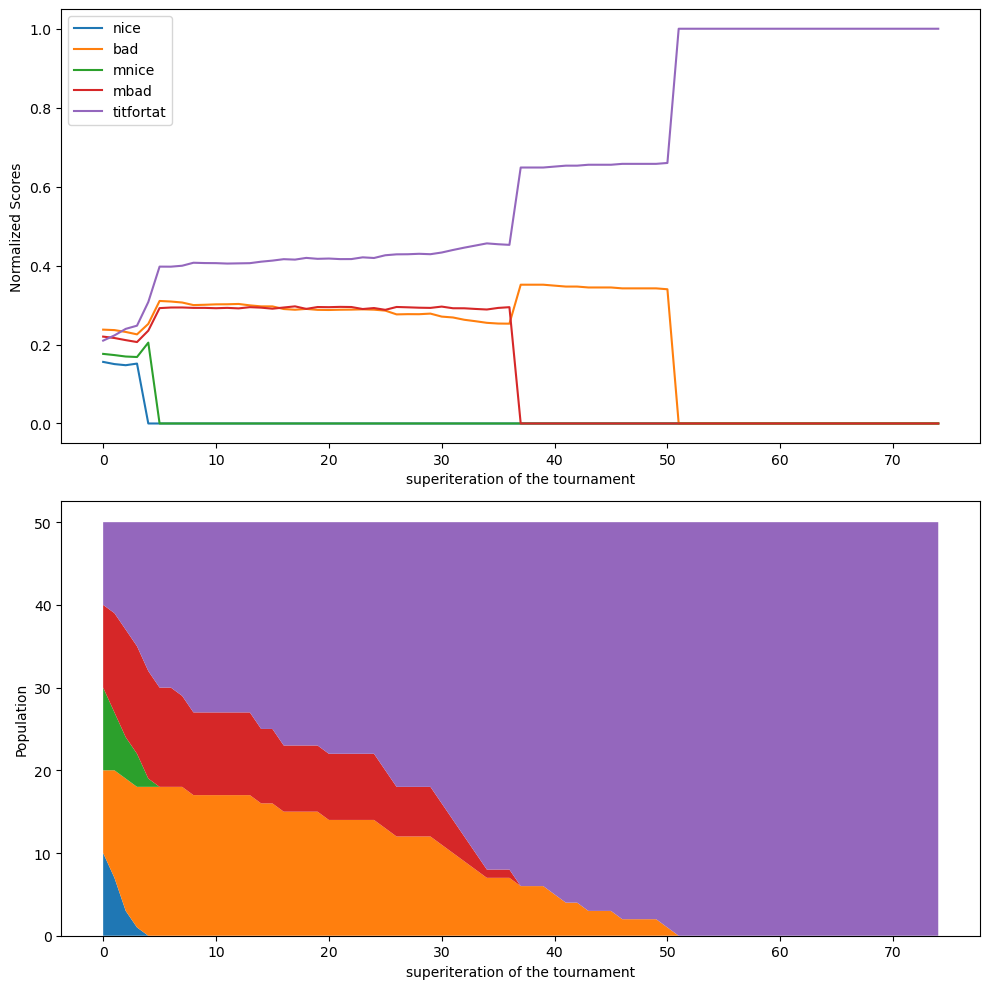

As you can see, we are updating the populations, according to the normalized scores of the previous superiteration. The nice "strategies" go extinct at the begining, and next the "bad" strategies are knocked out, so at the end the tit-for-tat strategy takes over the whole population. Below you can see the function with which we have implemented the rMPIPD. 

In [129]:
def rMPIPD(n, N_t, s_iter, allow_mut=False): # n is a vector of the number of players for each strategy in the initial configuration, N_t number of tournaments, s_iter is the number of super-iterations
    
    print("total number of players:", np.sum(n))
    print("mutation allowed:", allow_mut)
    

    n_games = s_iter

    mem_n = np.empty((len(strats), n_games)) # to store the number of players for each strategy in each super-iteration
    mem_s = np.empty((len(strats), n_games)) # to store the normalized score of each strategy in each super-iteration
    
    
    for i in range(n_games): #for each tournament super-iteration
        
        r = MPIPD(n, N_t, allow_mut)
        mem_n[:,i] = n
        
        
        tot_rew = np.sum(np.array(list(r.values())))
        normalized_scores = np.array(list(r.values()))/tot_rew

        mem_s[:,i] = normalized_scores
        n = exchangepop(n,normalized_scores)

        print(n)
        
    return mem_n, mem_s

Below we have replaced the tit-for-tat strategy with the grudger strategy, and the results show that the grudger startegy is able to beat the others even easier than the tit-for-tat strategy. 

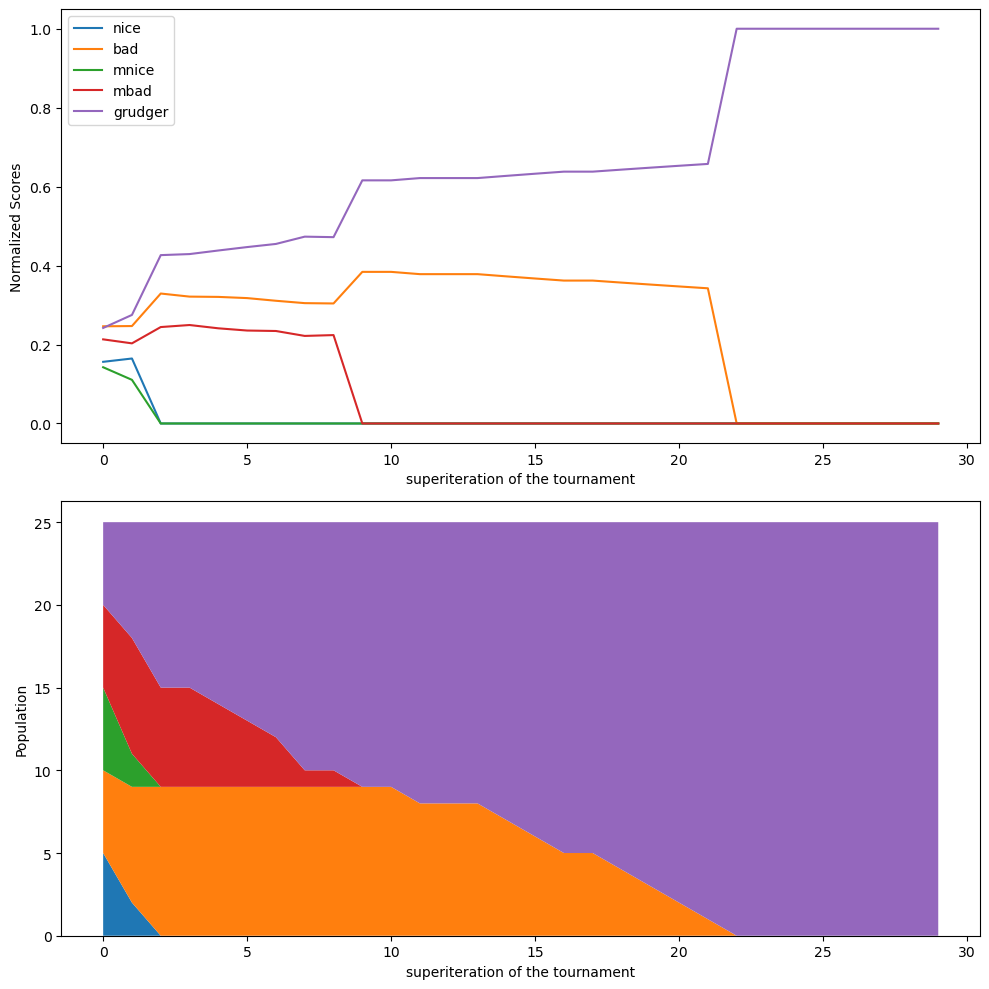

So it is interesting to see the result of a competition where both tit-for-tat and grugder strategies are included:

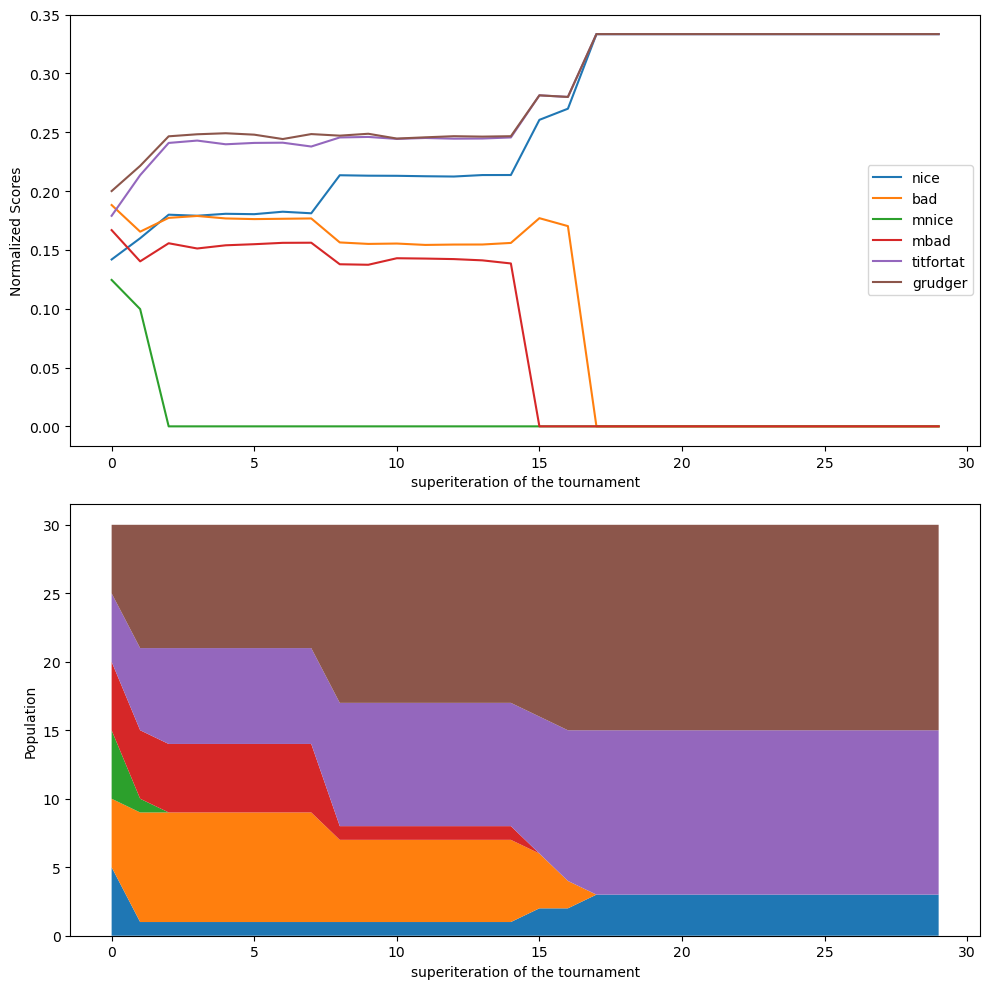

In this particular configuration we see that not only the tit-for-tat startegy competes well with the grudger but surprisingly the nice strategy which performed poorly in the previous cases, performs quite better in this configuration. So it is clear that the performance of each strategy depends heavily on the configuration: namely strategies present in the competition and also their initial population. 

#   4. rMPIPD with mutations





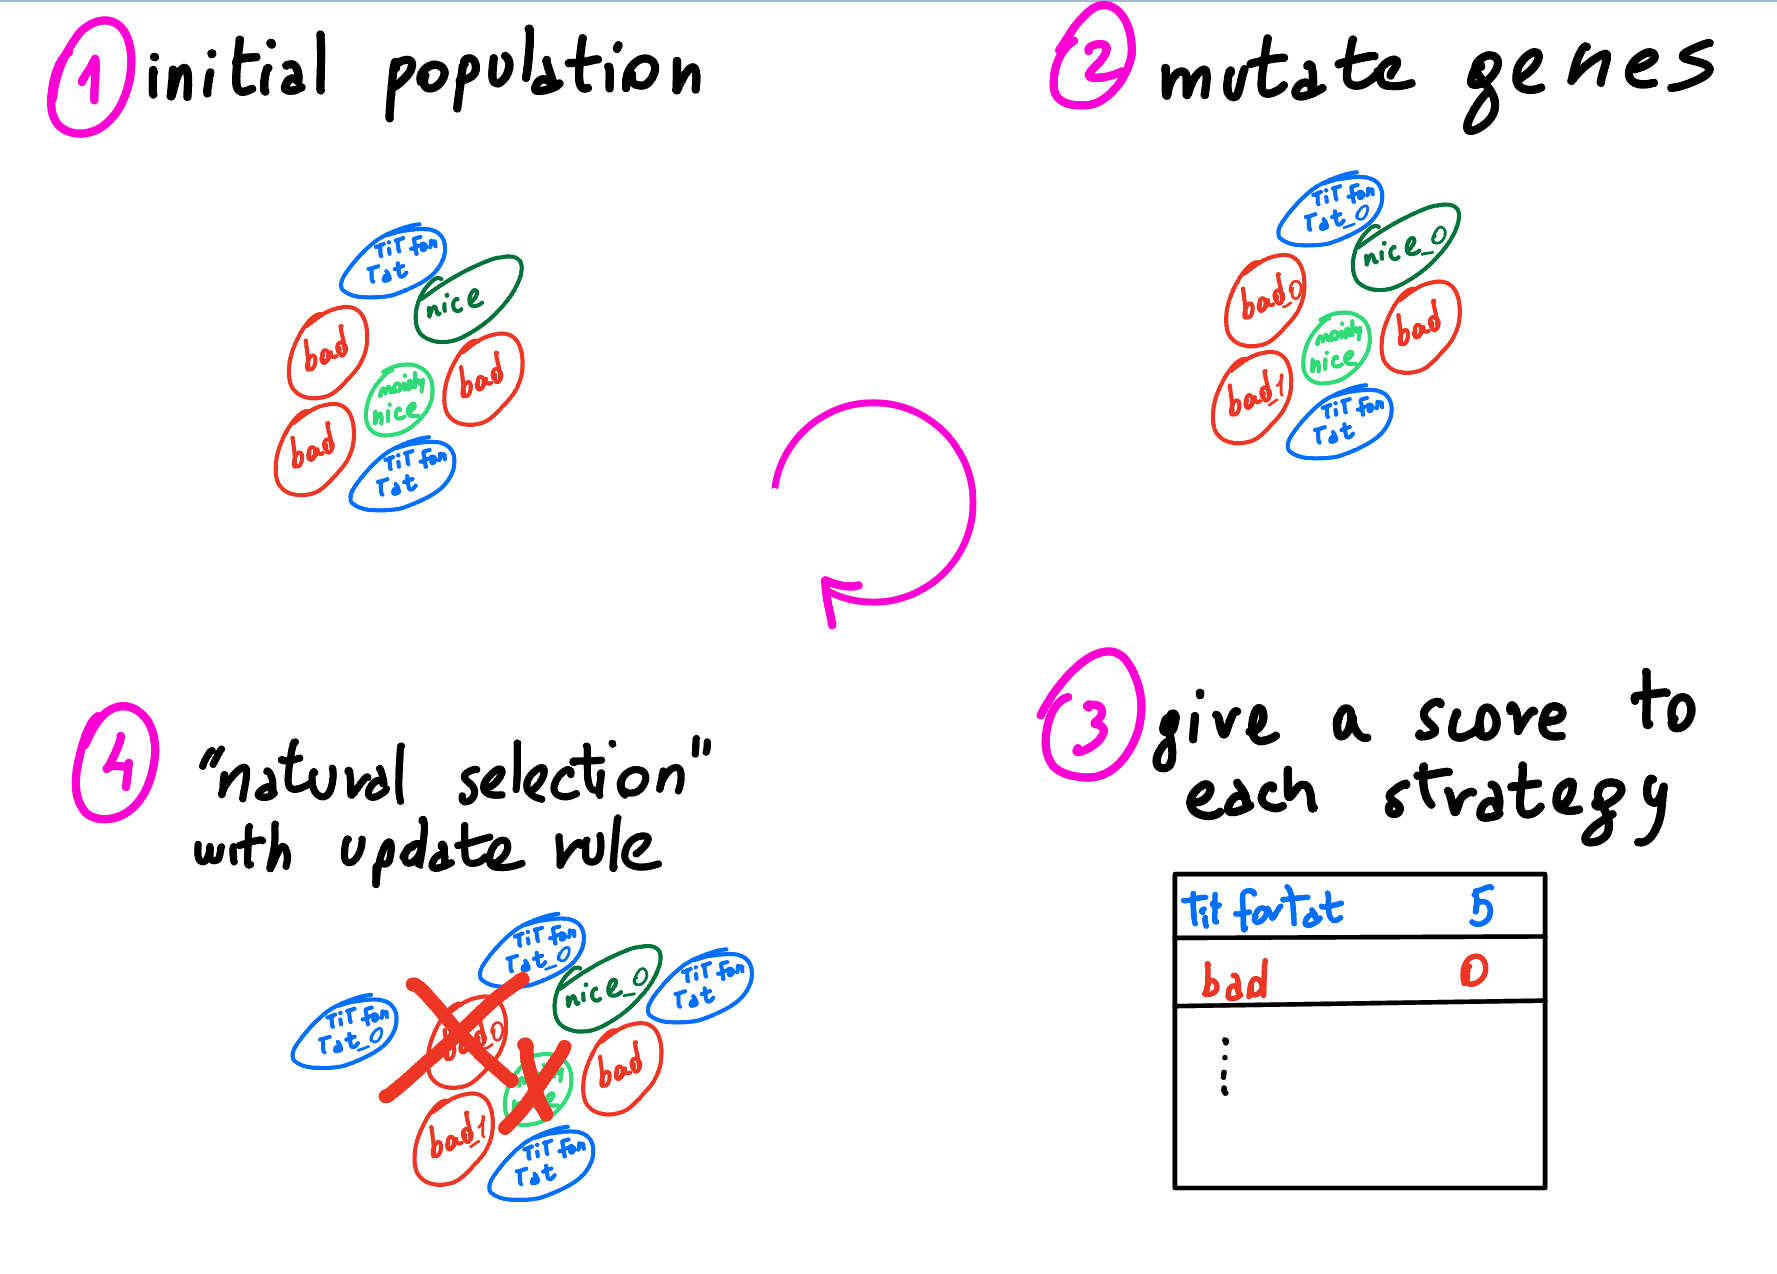

To implement mutations we have added: 
* **gene[ ]**, global array that encodes the genes
* boolean parameter **allow_mut**, which allow or not mutations in MPIPD() and rMPIPD() functions
* **mutation()** function, which mutate the gene randomly (50%)
* **update_strats()**, which update the strategies 
* **strat_decorator(s,i)** which "decorate" a general strategy **s**, implementing the actual mutation on it. 


In [5]:
gene = [0,0,0,0,0]

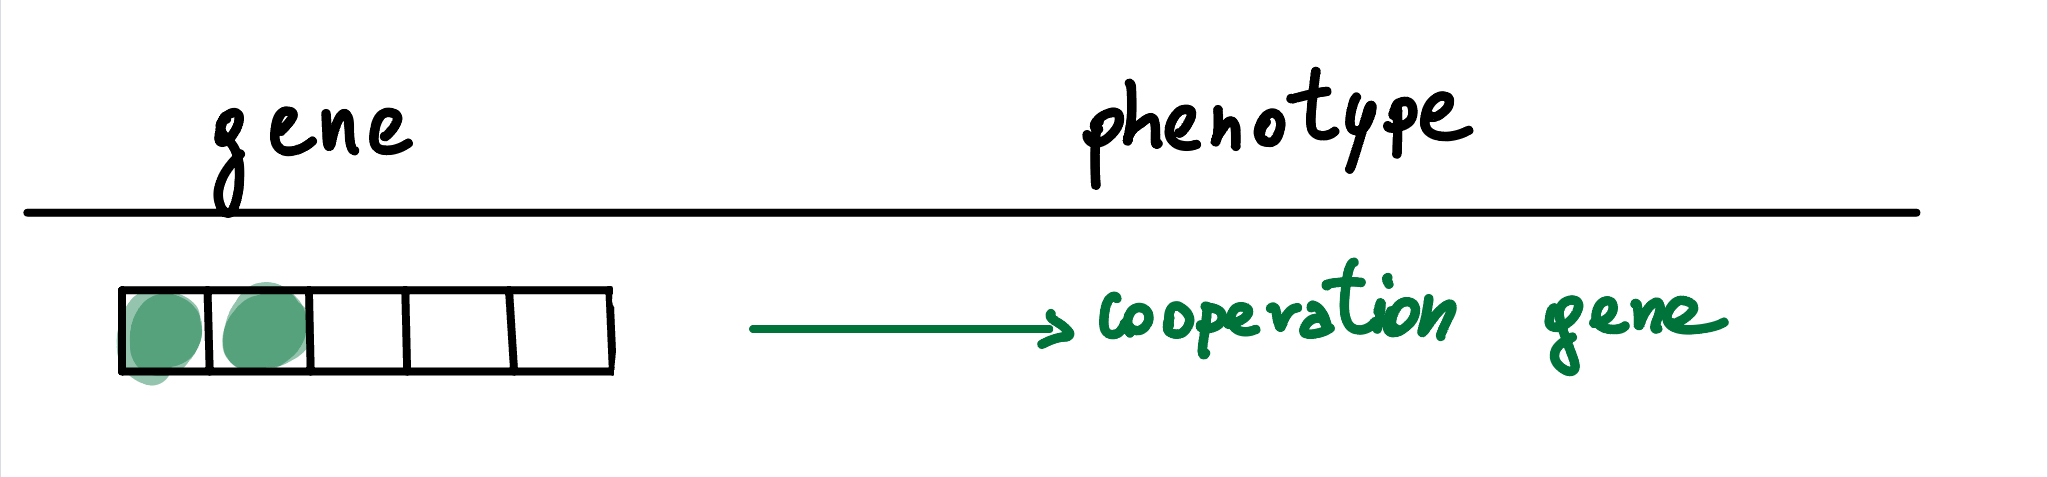

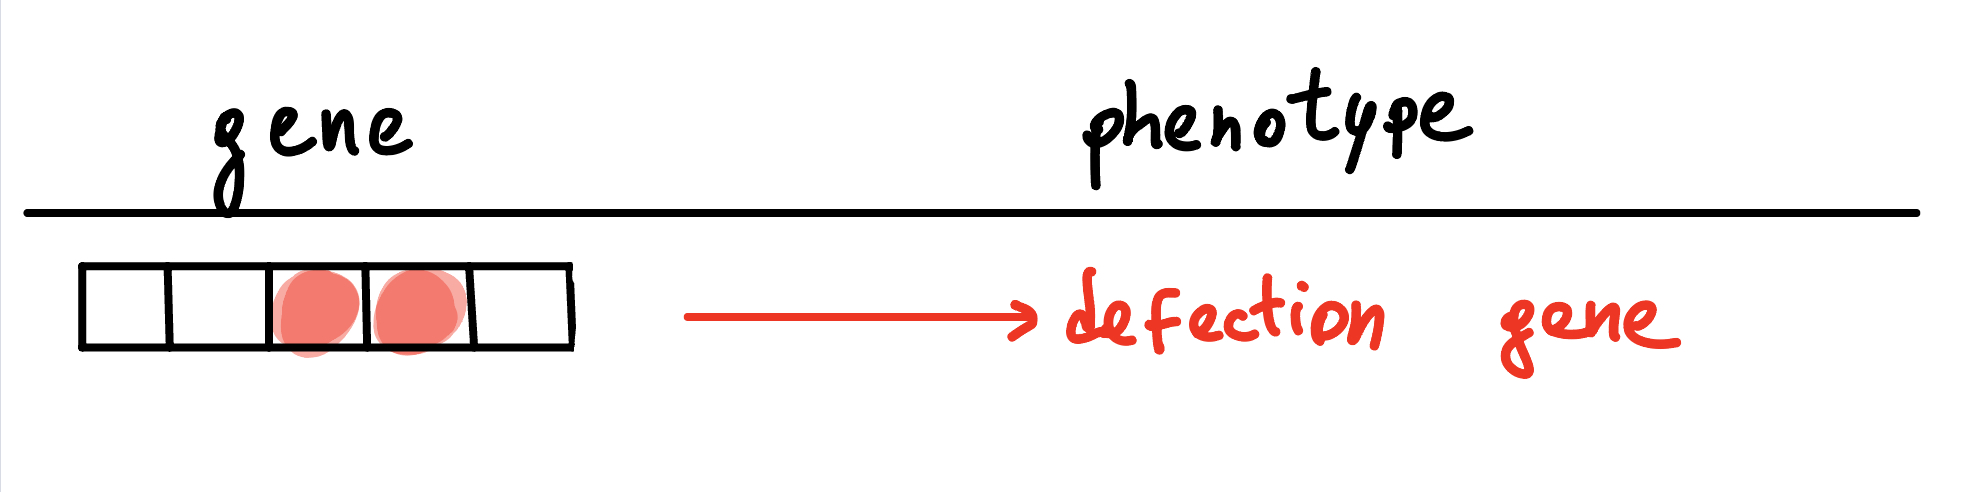

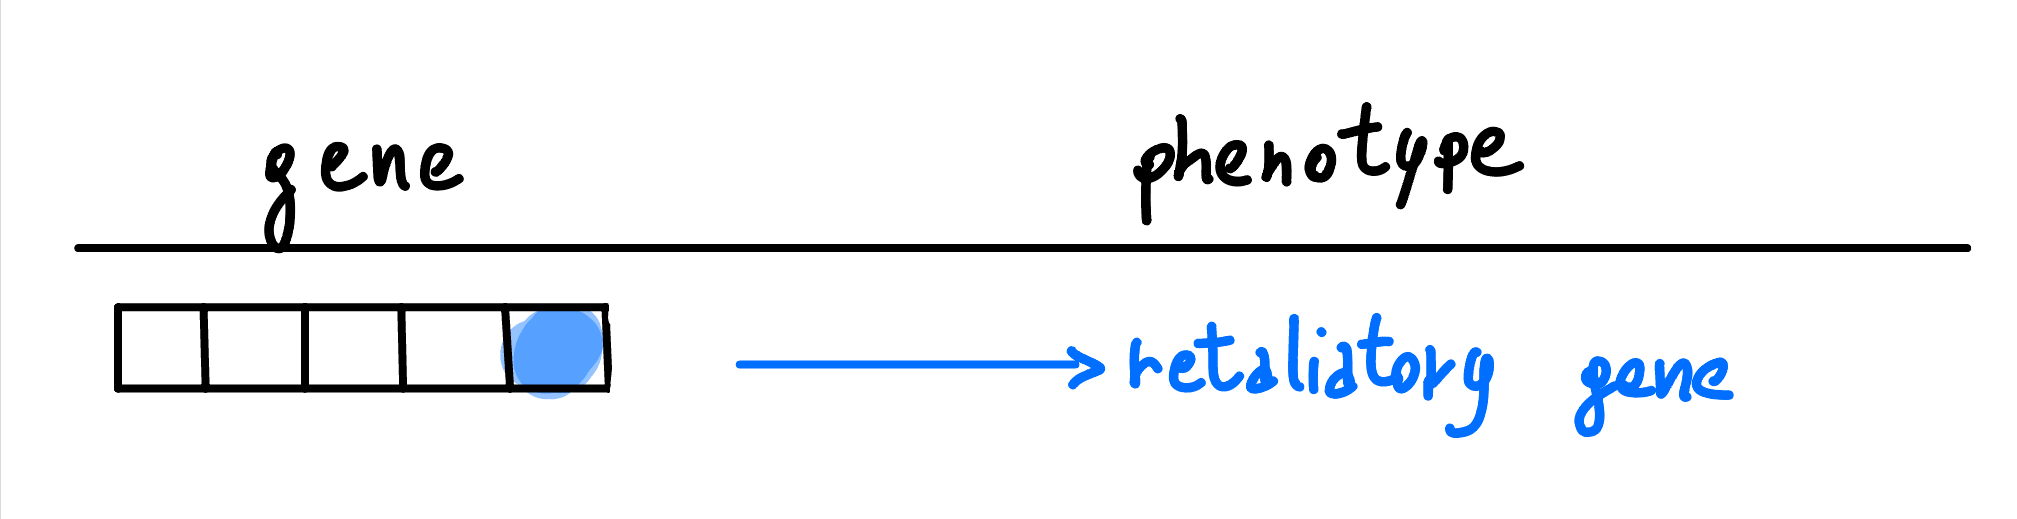

In [ ]:
def rMPIPD(n, N_t, s_iter, allow_mut=False): #n is a vector of the number of players for each strategy in the initial configuration, N_t number of tournaments, s_iter is the number of super-iterations
   
    ...
    
    for i in range(n_games): #for each tournament super-iteration
        
        ...
        
        r = MPIPD(n, N_t, allow_mut) 
        
        ...
        
    return mem_n

In [3]:
def MPIPD(n, N_t, allow_mut=False): #n is a vector of the number of players for each strategy in the initial configuration, N is the number of tournament
    
    if(allow_mut==True): mutation() #if mutation is allowed, we mutate the gene
        
    ...
    
    return res

In [6]:
def mutation(): # randomly decide to mutate or not
    for i in range(len(gene)):
        a = npr.rand()
        if (a < 0.5):
            gene[i] += 0.01    # "MUTATION DELTA"
    update_strats()

In [ ]:
def update_strats(): #update the dictionary of strategies
    strats = strats_1   #where strats_1 are the initial strategies that we want to implement
    gen_strats = {str(word)+'_'+str(i): strat_decorator(strats[word], i) for i in range(5) for word in list(strats.keys())} #strategies with mutations allowed
    strats = strats | gen_strats #we add the new strategies to the dictionary
    

### example: 
if we start we strat with

`strats_1 = {'nice': s_niceguy,
      'bad': s_badguy,
      'mnice': s_mnice,
      'mbad': s_mbad,
      'titfortat': s_titfortat} `
  
We will get 

`strats = {'nice': s_niceguy,
      'bad': s_badguy,
      'mnice': s_mnice,
      'mbad': s_mbad,
      'titfortat': s_titfortat,
      'nice_0': s_niceguy_0,
      'bad_0': s_badguy_0,
      ....
      'nice_5': s_niceguy_5,
      'bad_5': s_badguy_5,
      ...
      } `
      



In [2]:
def strat_decorator(s,i):   #it filter the strategies using genes' mutations
    if(i<2): #cooperation's gene (two)
        def wrapper(u_1h, u_2h):
            #print(s(u_1h, u_2h))
            uu = s(u_1h, u_2h)
            if (uu == u_d).all():
                b = npr.rand()
                #print(gene)
                if b < gene[i]:
                    #print("mutated")
                    return u_c
                else:
                    return u_d
            else:
                return u_c
        return wrapper
    
    if(1<i<4): 
        def wrapper(u_1h, u_2h): #defection's gene (two)
            #print(s(u_1h, u_2h))
            uu = s(u_1h, u_2h)
            if (uu == u_c).all():
                b = npr.rand()
                #print(gene)
                if b < gene[i]:
                    #print("mutated")
                    return u_d
                else:
                    return u_c
            else:
                return u_d
        return wrapper

    if(i==4): 
        def wrapper(u_1h, u_2h): #Retaliating's gene (one)
            uu = s(u_1h, u_2h)
            b = npr.rand()
            if (len(u_1h)>0 and b<gene[i]):
                if (u_2h[-1] == u_d).all():
                    return u_d
                else: 
                    return uu
            else:
                return uu
            
        return wrapper
        


#  We now run rMPIPD with mutations for one type of gene at a time and changing the "Delta Mutation" parameter 

`strats_1 = {'nice': s_niceguy,
      'bad': s_badguy,
      'mnice': s_mnice,
      'mbad': s_mbad,
      'titfortat': s_titfortat} `

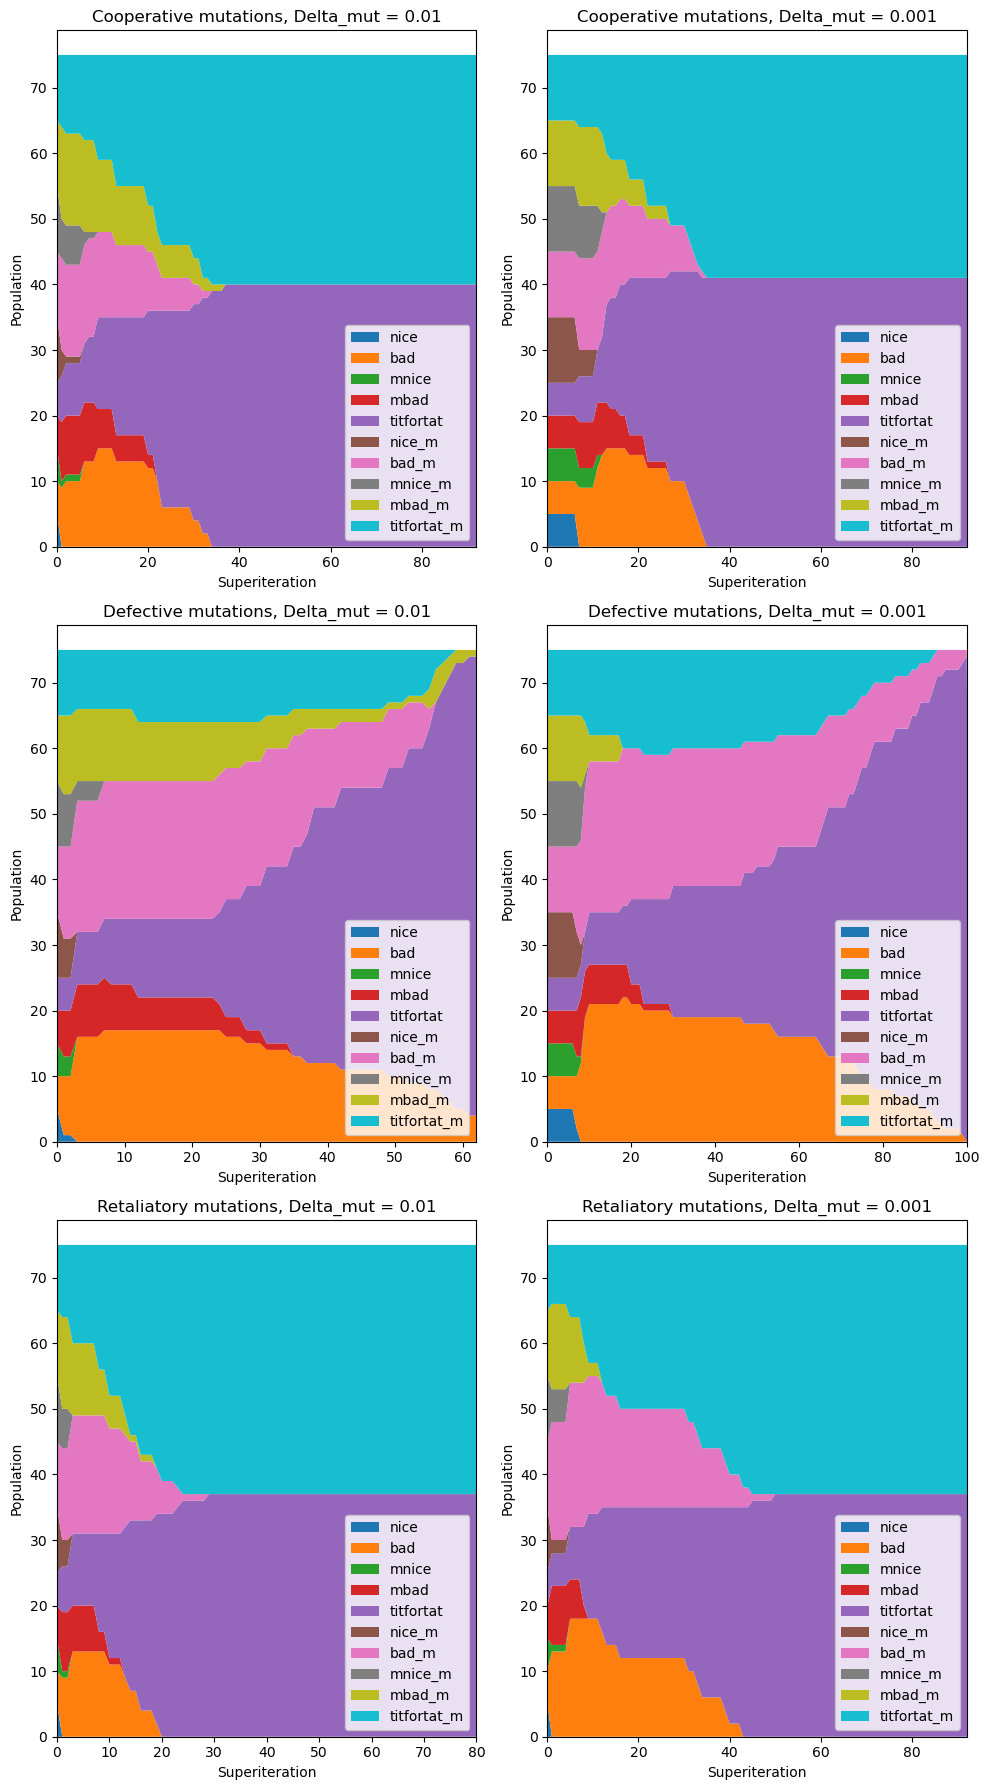

### For all gene types the change of the "Delta mutation" parameter is not really relevant, if not in the number of superiteration needed to reach convergence. Furthermore a lot of mutated strategies vanish very fast, while the ones that survive in the cooperative and retaliatory mutations are in fact TitForTat. 
### So, the genetic algorithm does not return any intresting strategy.

# We now run rMPIPD with more advanced strategies:


`strats_1 = {'nice': s_niceguy,
          'bad': s_badguy,
          'titfortat': s_titfortat,
          'forgiving_titfortat': s_forgiving_titfortat,
          'suspicious_titfortat': s_suspicious_titfortat,
          'hard_titfortat': s_hard_titfortat,
          'pavlov': s_pavlov,
          'grudger': s_grudger,
          'hard_joss' : s_hard_joss,
          'soft_joss': s_soft_joss
            }`

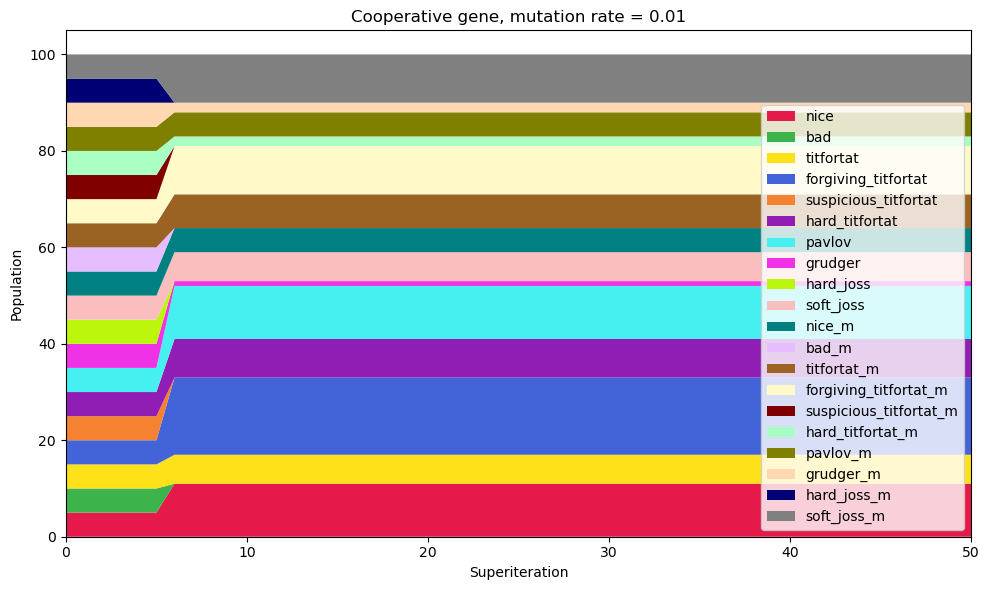

### Wee see that even with mutations no strategy prevails over the others significantly.
### We still have not found intresting strategies with the genetic algorithm.




#  We now want to study how TitForTat prevail and what are its limits


We will use the code for the rMPIPD with mutations to test the stability of TitForTat strategy affected by a perturbation.

Let's first analyze what happens without mutations:

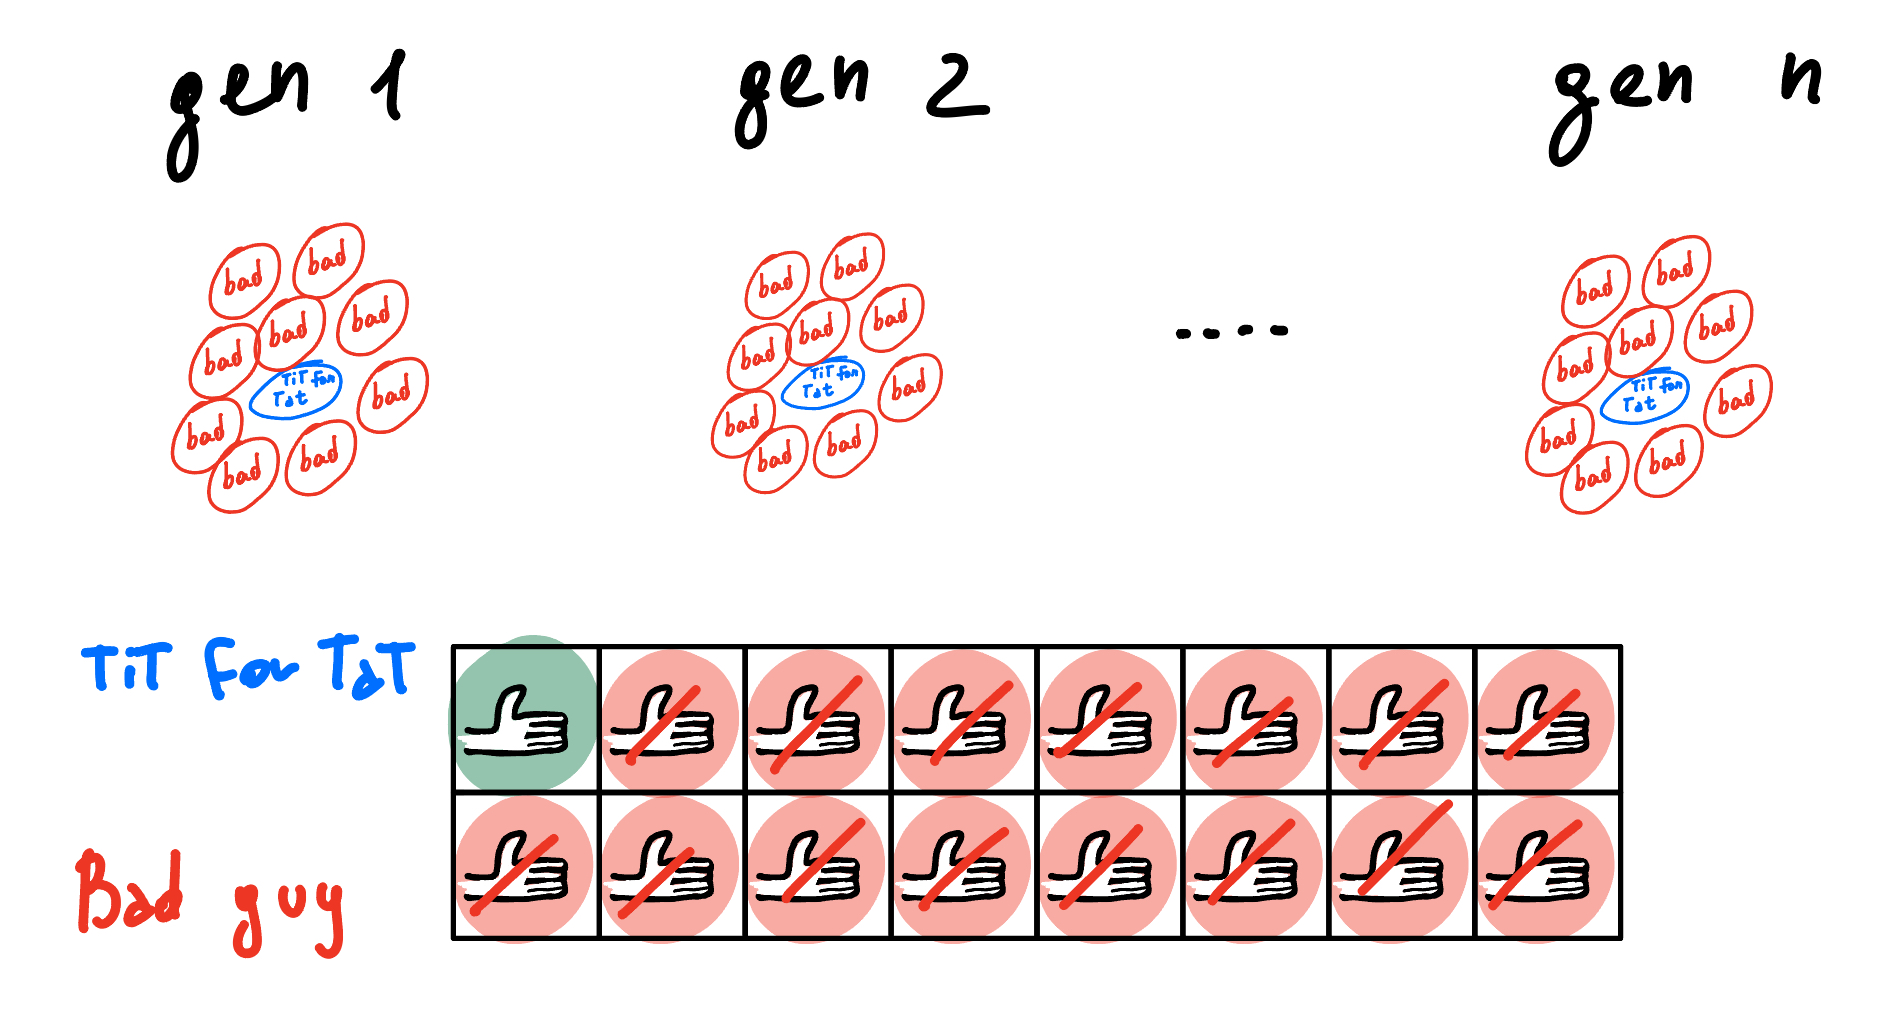

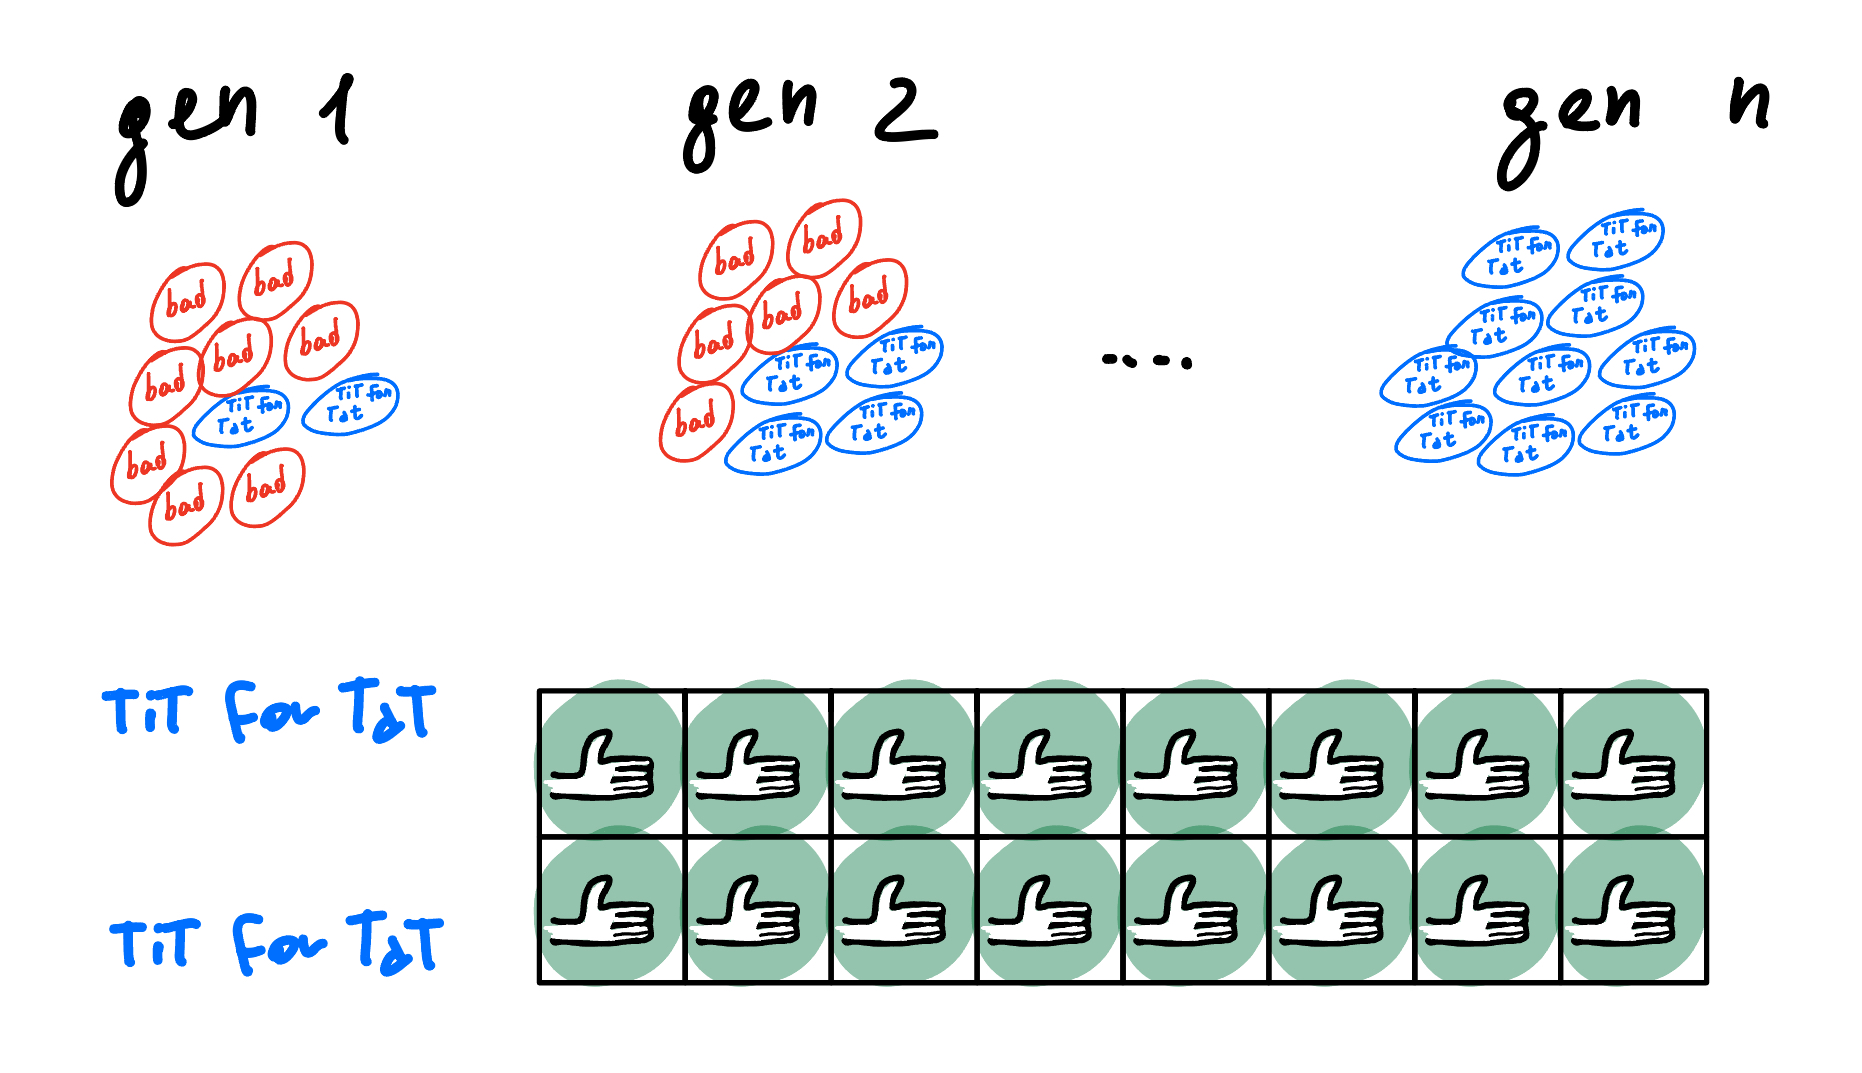

### Then with a perturbation on TitForTat strategy we expect:


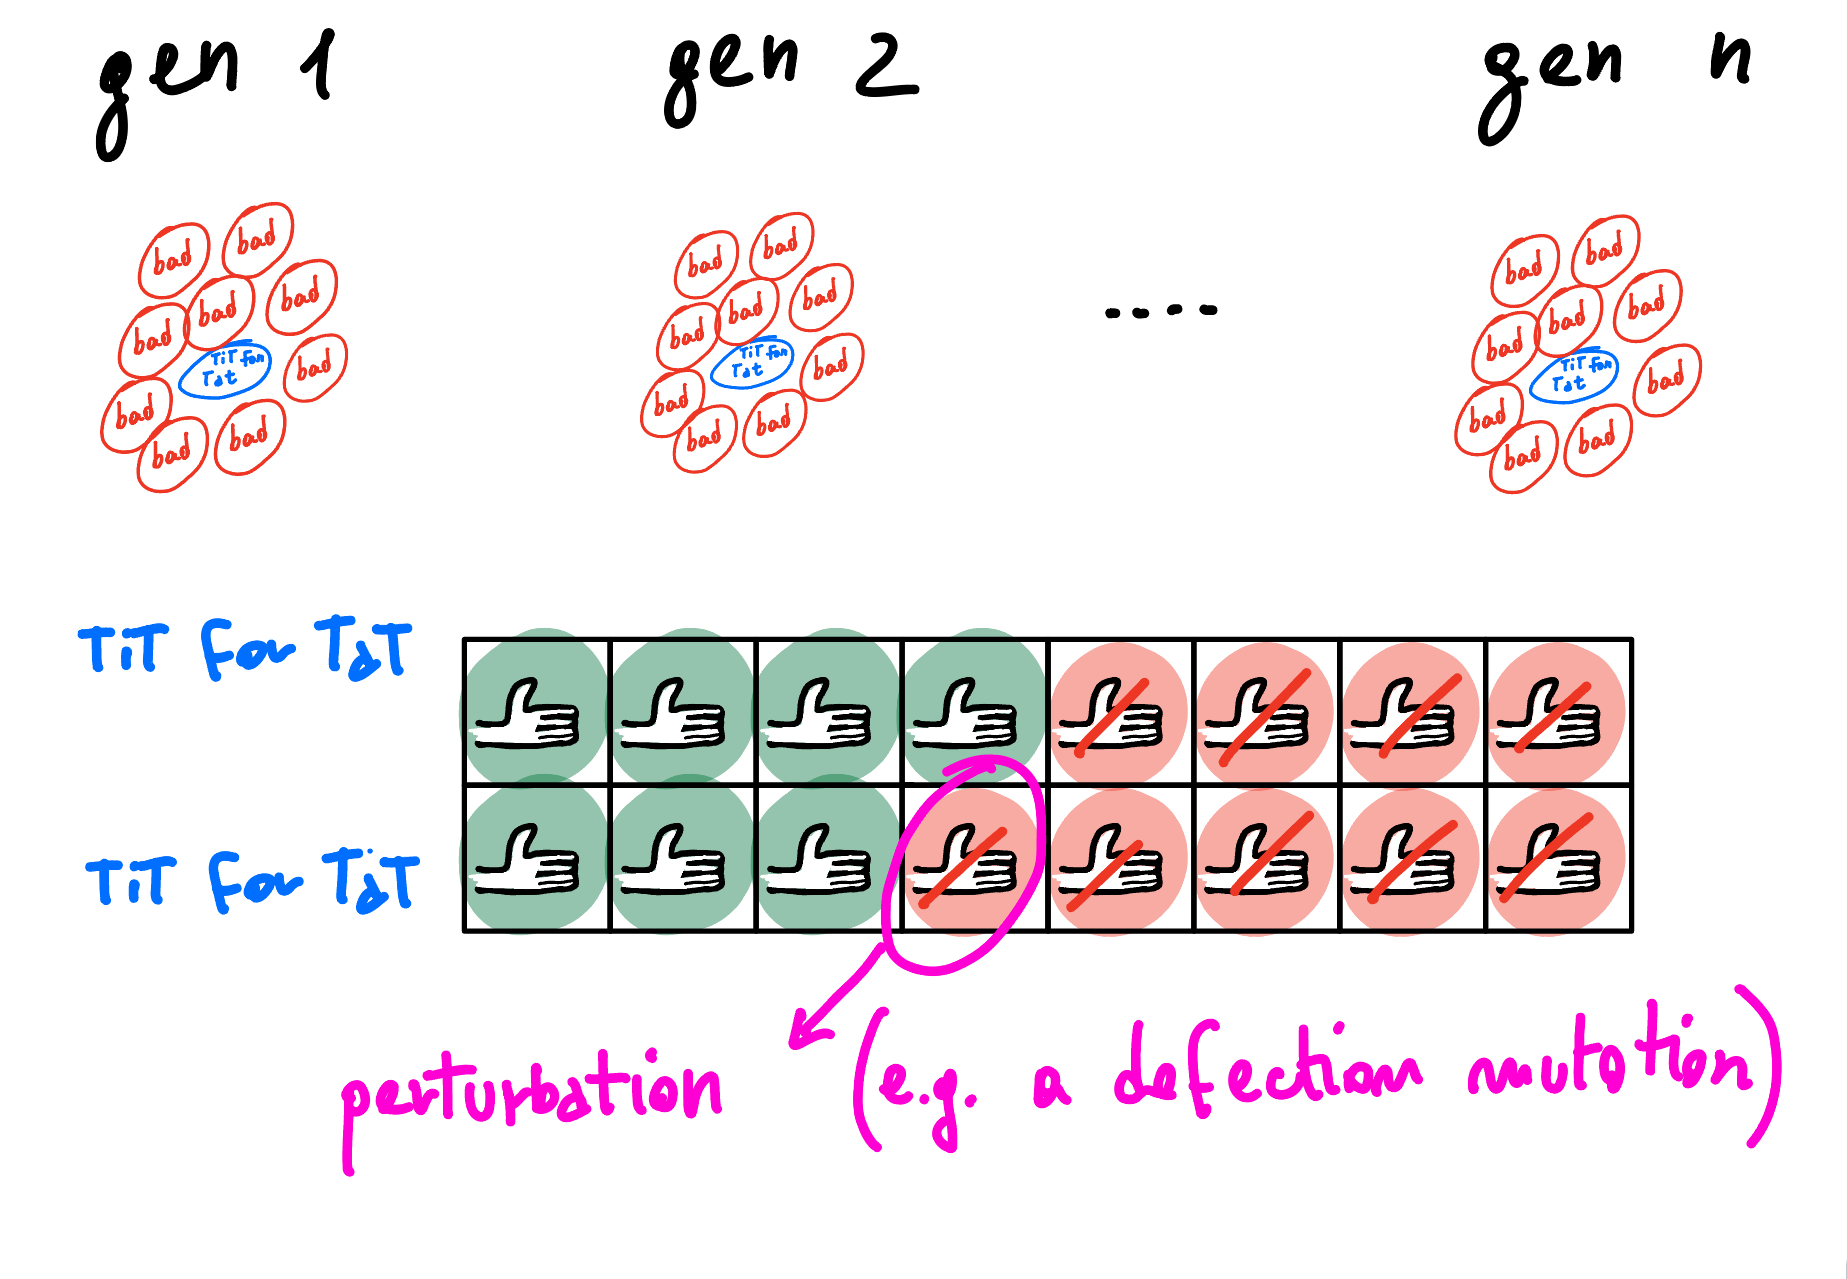

### This is what we found in our simulations:

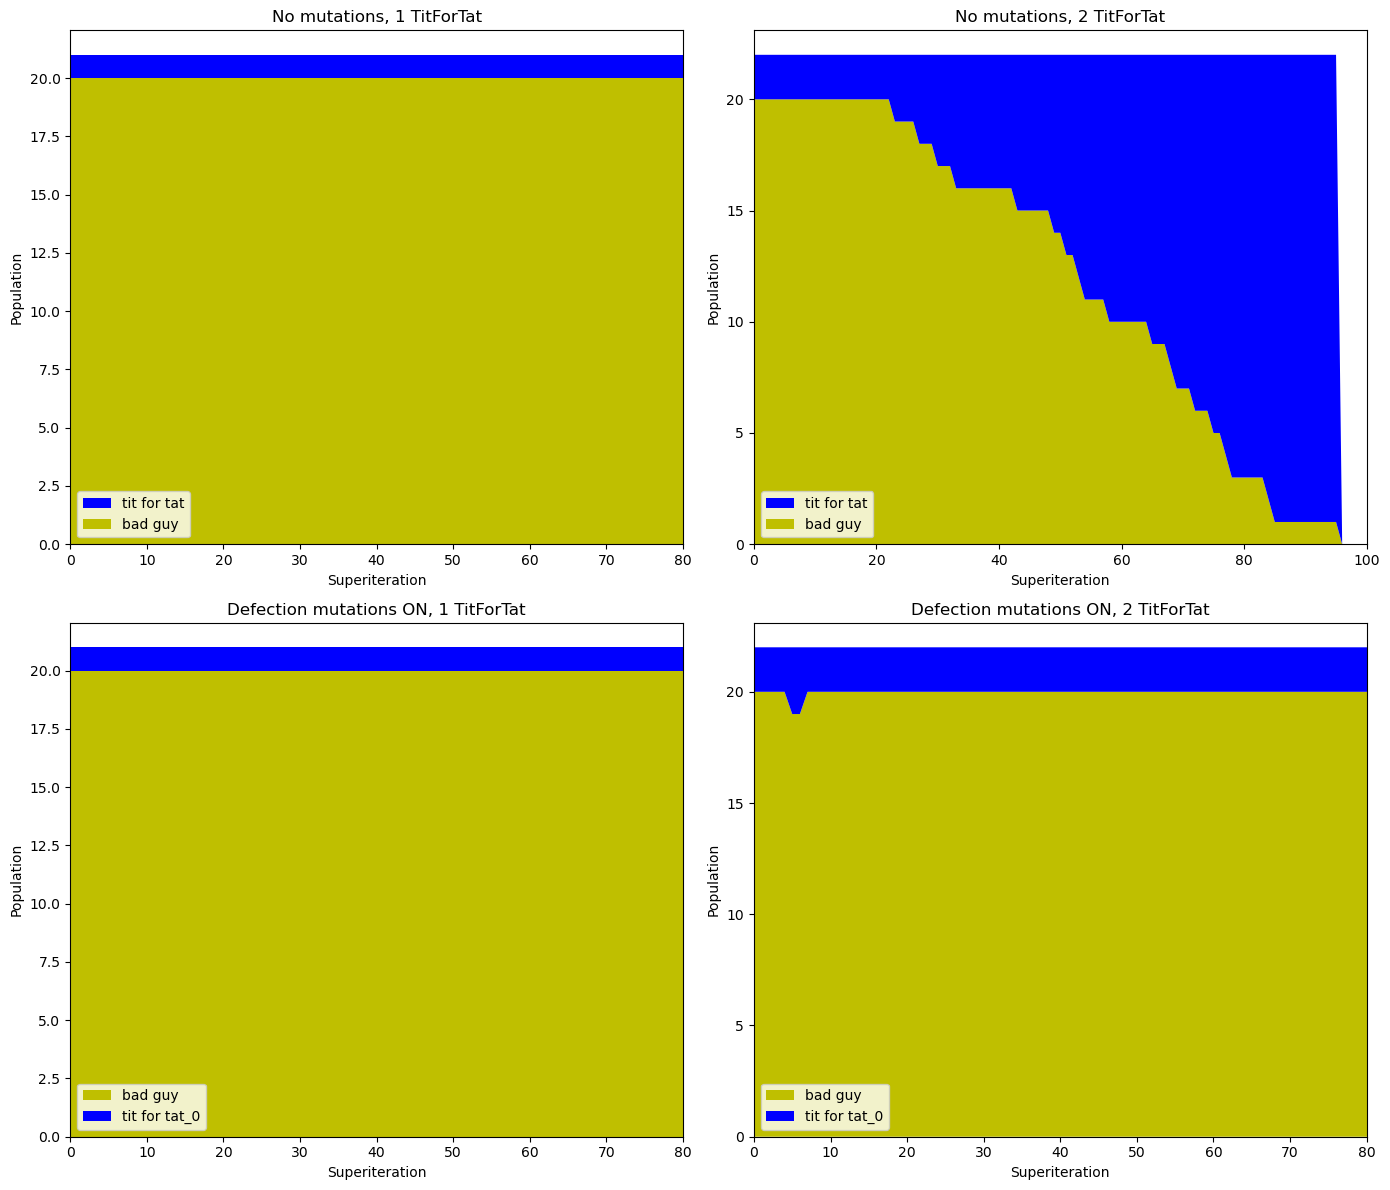

### Then, we demonstrated that TitForTat strategy, which is one of the best strategies, is **not** noise-tolerant.